In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SubCMedians.data_generator import make_subspace_blobs
from SubCMedians.subcmedians import subcmedians
from SubCMedians.subcmedians_v1 import subcmedians_v1
from SubCMedians.subcmedians_v2 import subcmedians_v2
from SubCMedians.subcmedians_v3 import subcmedians_v3
import SubCMedians.evaluation as evaluation

# Compare methods

In [74]:
def run_test(nb_runs,dataset_params,methods,methods_params):
    # buffers to save results
    histories = []
    evaluations = []
    for r in range(nb_runs):
        # Build dataset
        X,y_true,ss = make_subspace_blobs(**dataset_params)
        X = (X - X.mean(axis=0))/ X.std(axis=0)
        # Build and train models
        models = {m:methods[m](**methods_params) for m in methods}
        for m in methods:
            models[m].fit(X)
        # Predict
        y_pred = {m:models[m].predict(X) for m in methods}        
        # Save results
        for m in methods:
            # save History
            res = pd.DataFrame()
            res["sae"] = models[m]._sae_history
            res["genome_len"] = models[m]._genome_size_history
            res["nb_centers"] = models[m]._nb_centers_history
            res["method"] = m
            histories.append(res)
            # save evaluation
            scores = evaluation.evaluate(y_true,y_pred[m])
            scores["method"] = m
            scores = pd.DataFrame(pd.Series(scores))
            evaluations.append(scores.T)
    return(histories, evaluations)
        


In [75]:
D = 50
dataset_params={"p_dim": 0.7,
                "n_samples":10000,
                "n_features":D,
                "centers":15}

In [76]:
methods = {"v0":subcmedians,"v1":subcmedians_v1,"v2":subcmedians_v2,"v3":subcmedians_v3}
methods_params = {"D":D, 
                  "Gmax":500,
                  "H": 200,
                  "nb_iter": 15000}

In [77]:
histories, evaluations = run_test(10,dataset_params,methods,methods_params)

# Plot History

In [78]:
histories = pd.concat(histories)
histories["generation"] = histories.index

Text(0.5, 0, 'Iterations')

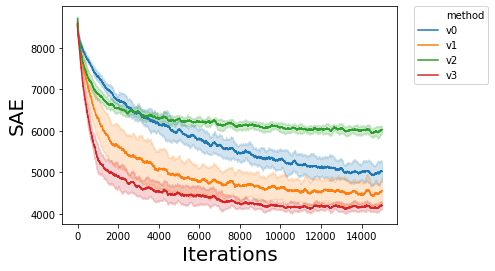

In [103]:
ax = sns.lineplot(x="generation",hue="method",y="sae",data=histories,markers=True,ci="sd")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("SAE",fontsize=20)
plt.xlabel("Iterations",fontsize=20)

Text(0.5, 0, 'Iterations')

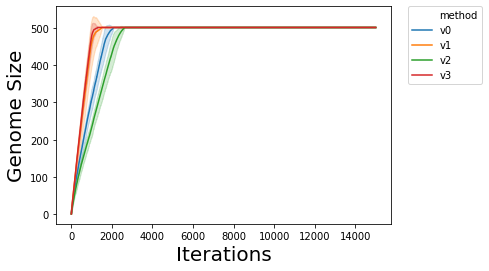

In [104]:
ax = sns.lineplot(x="generation",hue="method",y="genome_len",data=histories,markers=True,ci="sd")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Genome Size",fontsize=20)
plt.xlabel("Iterations",fontsize=20)

Text(0.5, 0, 'Iterations')

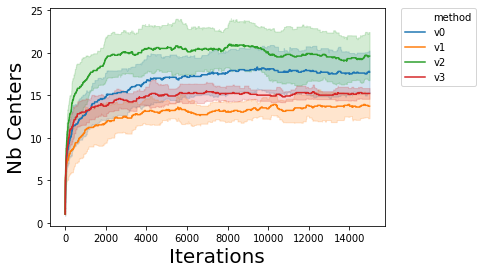

In [105]:
ax = sns.lineplot(x="generation",hue="method",y="nb_centers",data=histories,markers=True,ci="sd")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Nb Centers",fontsize=20)
plt.xlabel("Iterations",fontsize=20)

# Plot Quality

In [81]:
evaluations = pd.concat(evaluations)

(0.7, 1.02)

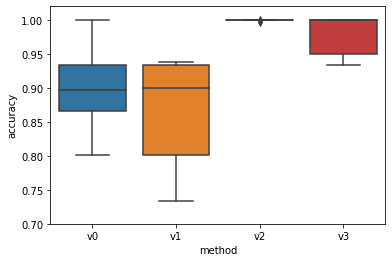

In [97]:
sns.boxplot(y="accuracy",x="method",data=evaluations[["accuracy", "method"]])
plt.ylim(0.7,1.02)

(0.7, 1.02)

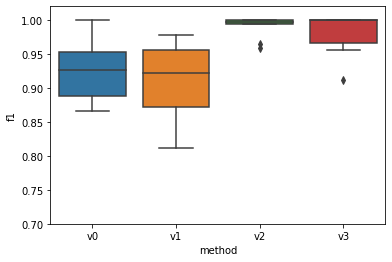

In [96]:
sns.boxplot(y="f1",x="method",data=evaluations[["f1", "method"]])
plt.ylim(0.7,1.02)

(0.7, 1.02)

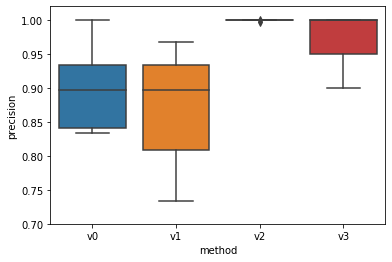

In [95]:
sns.boxplot(y="precision",x="method",data=evaluations[["precision", "method"]])
plt.ylim(0.7,1.02)

(0.7, 1.02)

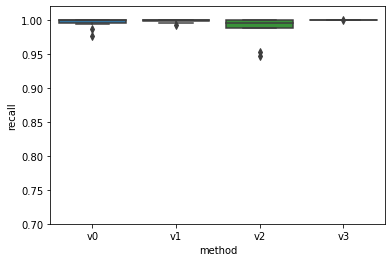

In [94]:
sns.boxplot(y="recall",x="method",data=evaluations[["recall", "method"]])
plt.ylim(0.7,1.02)

(0.7, 1.02)

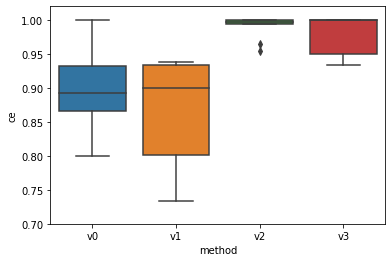

In [93]:
sns.boxplot(y="ce",x="method",data=evaluations[["ce", "method"]])
plt.ylim(0.7,1.02)